In [1]:
!pip install tensorflow
!pip install keras

! pip install numpy scipy
!pip install seaborn

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

import tensorflow as tf
from tensorflow import keras

In [31]:
dataset_cl = pd.read_csv('pulsar_stars.csv', sep=",")

### Датасет с данными о звездах с целью выявить среди них пульсары

In [32]:
dataset_cl.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
dataset_cl.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                       int64
dtype: object

In [6]:
dataset_cl.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [7]:
from sklearn import preprocessing


In [8]:
n_data = preprocessing.normalize(dataset_cl)

In [9]:
dataset_cl.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


### Масштабирование данных

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
dataset = dataset_cl
for col in dataset_cl.columns:
    if col!='target_class':
         dataset[col] = sc1.fit_transform(dataset_cl[[col]])

In [12]:
dataset.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,0.563516,0.294263,0.236676,0.050966,0.055566,0.183555,0.303691,0.089553,0.091574
std,0.137325,0.092467,0.106987,0.088247,0.132059,0.188537,0.119591,0.089285,0.288432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.509180,0.237869,0.191353,0.022939,0.007661,0.068430,0.236757,0.030962,0.000000
50%,0.584919,0.299640,0.211075,0.028480,0.011599,0.107395,0.307141,0.071285,0.000000
75%,0.649199,0.354712,0.236220,0.038912,0.023528,0.203905,0.367371,0.118432,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
corr=[[dataset.columns.values[x],  dataset.corr()["target_class"][x]] for x in range(dataset.shape[1])]
corr

[[' Mean of the integrated profile', -0.6731805813749446],
 [' Standard deviation of the integrated profile', -0.36370820870423204],
 [' Excess kurtosis of the integrated profile', 0.7915913821324954],
 [' Skewness of the integrated profile', 0.7095280231867442],
 [' Mean of the DM-SNR curve', 0.40087609259205687],
 [' Standard deviation of the DM-SNR curve', 0.4915350599791216],
 [' Excess kurtosis of the DM-SNR curve', -0.39081632359318763],
 [' Skewness of the DM-SNR curve', -0.25911669581633723],
 ['target_class', 1.0]]

In [14]:
corr.sort(key=lambda i: i[1])
corr

[[' Mean of the integrated profile', -0.6731805813749446],
 [' Excess kurtosis of the DM-SNR curve', -0.39081632359318763],
 [' Standard deviation of the integrated profile', -0.36370820870423204],
 [' Skewness of the DM-SNR curve', -0.25911669581633723],
 [' Mean of the DM-SNR curve', 0.40087609259205687],
 [' Standard deviation of the DM-SNR curve', 0.4915350599791216],
 [' Skewness of the integrated profile', 0.7095280231867442],
 [' Excess kurtosis of the integrated profile', 0.7915913821324954],
 ['target_class', 1.0]]

### Корреляция признаков

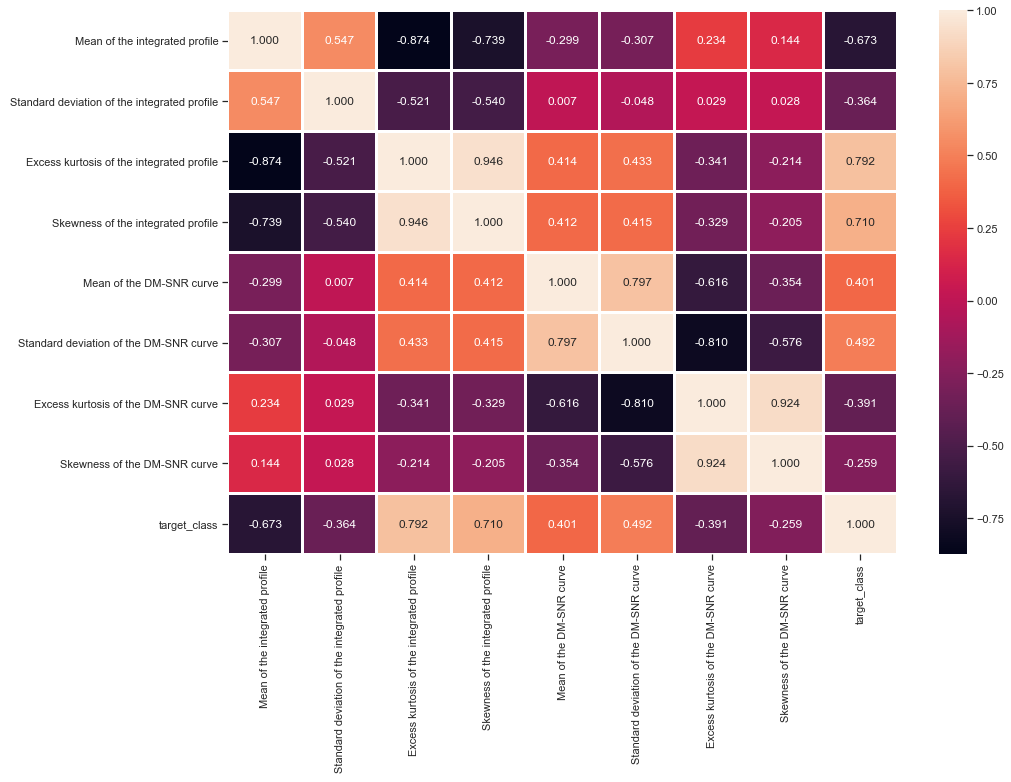

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.corr(),annot=True, fmt='.3f', linewidths=2)

### В данных очень много отрицательных ответов(target_class=0) , поэтому решил для обучения выровнять соотношение ответов

In [16]:
data_0=dataset.loc[dataset['target_class']==0]

data_1=dataset.loc[dataset['target_class']==1]
data_1.head()

del_msk = np.random.rand(len(data_0)) < 0.85
data_0=data_0[~del_msk]

data=pd.concat([data_1,data_0])
#data.head()
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000
mean,0.463110,0.257410,0.329275,0.119541,0.113538,0.285275,0.252362,0.063989,0.407813
std,0.202058,0.110616,0.189709,0.166936,0.178679,0.235775,0.128404,0.082476,0.491489
min,0.000000,0.000000,0.000000,0.000143,0.000341,0.000759,0.011078,0.000023,0.000000
25%,0.317323,0.174705,0.201193,0.025112,0.009284,0.085315,0.137538,0.004381,0.000000
50%,0.519343,0.266637,0.234582,0.036669,0.019534,0.178823,0.252051,0.038168,0.000000
75%,0.618376,0.336919,0.417663,0.139967,0.135989,0.492886,0.337228,0.092648,1.000000
max,1.000000,0.905816,1.000000,1.000000,0.936858,0.990999,0.972131,0.957545,1.000000


### Теперь в данных поровну с target_class=1 и 0

In [17]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.519844,0.221824,0.308105,0.073319,0.136070,0.587874,0.137546,0.003888,1
1,0.551503,0.280102,0.220460,0.027547,0.020058,0.132401,0.242889,0.039282,0
2,0.411150,0.336167,0.281121,0.037195,0.010542,0.118880,0.355200,0.094339,1
3,0.493873,0.272396,0.241663,0.037041,0.323477,0.740151,0.094979,0.000359,0
4,0.664506,0.315594,0.192409,0.030120,0.011082,0.098755,0.328663,0.087068,0


In [18]:
msk = np.random.rand(len(data)) < 0.8

train=data[msk]
test=data[~msk]

y_train=train['target_class']
y_test=test['target_class']

del test['target_class']
del train['target_class']



## Точность метода наименьших квадратов на тренировочных и тестовых данных

In [19]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(n_jobs=-1, random_state=7)
logit.fit(train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=7,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [20]:
round(logit.score(train, y_train), 3), round(logit.score(test, y_test), 3),

(0.933, 0.933)

## Точность метода опорных векторов на тренировочных и тестовых данных

In [21]:
from sklearn import svm
clf = svm.SVC()
clf.fit(train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
round(clf.score(train, y_train), 3), round(clf.score(test, y_test), 3),

(0.946, 0.946)

## Точность перцептрона на тренировочных и тестовых данных

In [23]:
from sklearn.linear_model import Perceptron
perc = Perceptron(tol=1e-3, random_state=0)
perc.fit(train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [24]:
round(perc.score(train, y_train), 3), round(perc.score(test, y_test), 3),

(0.945, 0.948)

## Точность стохастического град. спуска на тренировочных и тестовых данных

In [29]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
round(sgd.score(train, y_train), 3), round(sgd.score(test, y_test), 3),

(0.941, 0.947)